<a href="https://colab.research.google.com/github/Pracara/MBA/blob/main/deployMBA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Market Basket Analysis - Associoation**




In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisierung
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Warning
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**



In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
path='/content/Data.xlsx'
df=pd.read_excel(path, sheet_name='Sheet2')
df.head()

,Date,2024-02-12 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Time,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Inv_ID,Date,Time,Product_ID,Product_Name,Category,Brand,Price,Quantity,Product_ID,...,Brand,Price,Quantity,Product_ID,Product_Name,Category,Brand,Price,Quantity,Total_Amount
3,1232,2024-02-12 00:00:00,00:58:18,1040,Cadbury Gems,Snacks,Cadbury,45,2,1018,...,Kellogg's,200,4,1059,Saffola Tasty Oats,Snacks,Saffola,90,1,1100
4,1233,2024-02-12 00:00:00,06:48:15,1002,Aashirvaad Atta,Grains,Aashirvaad,45,5,1029,...,Alokozay,220,2,1018,Haldiram's Aloo Bhujia,Snacks,Haldiram's,120,2,2305


In [ ]:
#skipping 3 rows as the data starts from 4th row
df2=pd.read_excel(path, sheet_name='Sheet2', skiprows=3)
df2.head()

,Inv_ID,Date,Time,Product_ID,Product_Name,Category,Brand,Price,Quantity,Product_ID.1,...,Brand.2,Price.2,Quantity.2,Product_ID.3,Product_Name.3,Category.3,Brand.3,Price.3,Quantity.3,Total_Amount
0,1232,2024-02-12,00:58:18,1040,Cadbury Gems,Snacks,Cadbury,45,2,1018,...,Kellogg's,200,4,1059,Saffola Tasty Oats,Snacks,Saffola,90,1,1100
1,1233,2024-02-12,06:48:15,1002,Aashirvaad Atta,Grains,Aashirvaad,45,5,1029,...,Alokozay,220,2,1018,Haldiram's Aloo Bhujia,Snacks,Haldiram's,120,2,2305
2,1234,2024-02-12,02:27:44,1021,Britannia Good Day,Snacks,Britannia,40,2,1050,...,Dabur,85,3,1025,Cadbury Perk,Snacks,Cadbury,25,5,910
3,1235,2024-02-12,00:05:11,1051,Dhara Refined Oil,Essentials,Dhara,190,5,1003,...,Sunlight,150,2,1064,Tropicana Apple Juice,Beverages,Tropicana,160,2,1670
4,1236,2024-02-12,10:40:11,1014,Horlicks Malted Milk,Beverages,Horlicks,250,4,1039,...,Kellogg's,200,2,1018,Haldiram's Aloo Bhujia,Snacks,Haldiram's,120,3,1835


In [ ]:
# Get a summary of the dataset
print(df2.shape)
print(df2.info())

(999, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Inv_ID          999 non-null    int64         
 1   Date            999 non-null    datetime64[ns]
 2   Time            999 non-null    object        
 3   Product_ID      999 non-null    int64         
 4   Product_Name    999 non-null    object        
 5   Category        999 non-null    object        
 6   Brand           999 non-null    object        
 7   Price           999 non-null    int64         
 8   Quantity        999 non-null    int64         
 9   Product_ID.1    999 non-null    int64         
 10  Product_Name.1  999 non-null    object        
 11  Category.1      999 non-null    object        
 12  Brand.1         999 non-null    object        
 13  Price.1         999 non-null    int64         
 14  Quantity.1      999 non-null    int64         
 

In [ ]:
#Checking duplicate
df2.duplicated().any()

False

**Data preparation**

In [ ]:
#Finding specifi coloumns for association
specific_columns = pd.read_excel(path, sheet_name='Sheet2',skiprows=3, usecols="A,E,K,Q,W")
print(specific_columns)

     Inv_ID            Product_Name                     Product_Name.1  \
0      1232            Cadbury Gems             Haldiram's Aloo Bhujia   
1      1233         Aashirvaad Atta                 Nescafe Cappuccino   
2      1234      Britannia Good Day                       Cadbury Silk   
3      1235       Dhara Refined Oil                          Tata Salt   
4      1236    Horlicks Malted Milk          Dabur Gulabari Rose Water   
..      ...                     ...                                ...   
994    2226  Big Bazaar Chakki Atta                    Aashirvaad Atta   
995    2227    Patanjali Dant Kanti                       Cadbury Silk   
996    2228               Amul Milk                    Britannia Marie   
997    2229    Kellogg's Cornflakes              Sunfeast Dark Fantasy   
998    2230         Dettol Handwash  Himalaya Purifying Neem Face Wash   

            Product_Name.2          Product_Name.3  
0     Kellogg's Cornflakes      Saffola Tasty Oats  
1    

In [ ]:
multiple_ranges = pd.read_excel(path, sheet_name='Sheet2',skiprows=3, usecols="A,B,E,K,Q,W")
print(multiple_ranges)

     Inv_ID       Date            Product_Name  \
0      1232 2024-02-12            Cadbury Gems   
1      1233 2024-02-12         Aashirvaad Atta   
2      1234 2024-02-12      Britannia Good Day   
3      1235 2024-02-12       Dhara Refined Oil   
4      1236 2024-02-12    Horlicks Malted Milk   
..      ...        ...                     ...   
994    2226 2024-02-12  Big Bazaar Chakki Atta   
995    2227 2024-02-12    Patanjali Dant Kanti   
996    2228 2024-02-12               Amul Milk   
997    2229 2024-02-12    Kellogg's Cornflakes   
998    2230 2024-02-12         Dettol Handwash   

                        Product_Name.1         Product_Name.2  \
0               Haldiram's Aloo Bhujia   Kellogg's Cornflakes   
1                   Nescafe Cappuccino           Alokozay Tea   
2                         Cadbury Silk   Dabur Red Toothpaste   
3                            Tata Salt      Sunlight Dishwash   
4            Dabur Gulabari Rose Water   Kellogg's Cornflakes   
..       

In [ ]:
#Spiliting data to new coloumn using comma separated
multiple_ranges['ProductName'] = multiple_ranges['Product_Name'] + "," + multiple_ranges['Product_Name.1'] + "," + multiple_ranges['Product_Name.2'] + "," + multiple_ranges['Product_Name.3']
multiple_ranges.head()

,Inv_ID,Date,Product_Name,Product_Name.1,Product_Name.2,Product_Name.3,ProductName
0,1232,2024-02-12,Cadbury Gems,Haldiram's Aloo Bhujia,Kellogg's Cornflakes,Saffola Tasty Oats,"Cadbury Gems,Haldiram's Aloo Bhujia,Kellogg's ..."
1,1233,2024-02-12,Aashirvaad Atta,Nescafe Cappuccino,Alokozay Tea,Haldiram's Aloo Bhujia,"Aashirvaad Atta,Nescafe Cappuccino,Alokozay Te..."
2,1234,2024-02-12,Britannia Good Day,Cadbury Silk,Dabur Red Toothpaste,Cadbury Perk,"Britannia Good Day,Cadbury Silk,Dabur Red Toot..."
3,1235,2024-02-12,Dhara Refined Oil,Tata Salt,Sunlight Dishwash,Tropicana Apple Juice,"Dhara Refined Oil,Tata Salt,Sunlight Dishwash,..."
4,1236,2024-02-12,Horlicks Malted Milk,Dabur Gulabari Rose Water,Kellogg's Cornflakes,Haldiram's Aloo Bhujia,"Horlicks Malted Milk,Dabur Gulabari Rose Water..."


In [ ]:
# Descriptive Statistics
df2.describe()

,Inv_ID,Date,Product_ID,Price,Quantity,Product_ID.1,Price.1,Quantity.1,Product_ID.2,Price.2,Quantity.2,Product_ID.3,Price.3,Quantity.3,Total_Amount
count,999.000000,999,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000
mean,1731.000000,2024-02-12 00:00:00,1035.720721,125.05005,3.080080,1036.183183,123.833834,3.027027,1035.153153,126.451451,3.067067,1034.415415,123.933934,3.09009,1514.049049
min,1232.000000,2024-02-12 00:00:00,1001.000000,20.00000,1.000000,1001.000000,20.000000,1.000000,1001.000000,20.000000,1.000000,1001.000000,20.000000,1.00000,250.000000
25%,1481.500000,2024-02-12 00:00:00,1018.000000,60.00000,2.000000,1018.000000,55.000000,2.000000,1018.000000,55.000000,2.000000,1018.000000,55.000000,2.00000,1002.500000
50%,1731.000000,2024-02-12 00:00:00,1037.000000,90.00000,3.000000,1036.000000,90.000000,3.000000,1036.000000,90.000000,3.000000,1033.000000,90.000000,3.00000,1430.000000
75%,1980.500000,2024-02-12 00:00:00,1053.000000,185.00000,4.000000,1054.000000,180.000000,4.000000,1051.000000,190.000000,4.000000,1052.000000,190.000000,4.00000,1890.000000
max,2230.000000,2024-02-12 00:00:00,1070.000000,400.00000,5.000000,1070.000000,400.000000,5.000000,1070.000000,400.000000,5.000000,1070.000000,400.000000,5.00000,4215.000000
std,288.530761,NaN,20.542860,85.01413,1.422547,20.489097,86.187429,1.397202,19.638863,86.302617,1.420049,20.100115,86.542874,1.39850,670.921208


**Data Filtering and Cleaning**

In [ ]:
#reading data
df3 = multiple_ranges

#Spiliting coloumns to row for association
new_df = pd.DataFrame(df3.ProductName.str.split(',').tolist(), index=df3[['Inv_ID','Date']]).stack()

# Reset the index and name the levels
new_df = new_df.reset_index(name='Inv_ID')

# Rename the columns for clarity
new_df.columns = ['Inv_ID', 'Date', 'ProductName']

#Printing the value
new_df.head()

,Inv_ID,Date,ProductName
0,"(1232, 2024-02-12 00:00:00)",0,Cadbury Gems
1,"(1232, 2024-02-12 00:00:00)",1,Haldiram's Aloo Bhujia
2,"(1232, 2024-02-12 00:00:00)",2,Kellogg's Cornflakes
3,"(1232, 2024-02-12 00:00:00)",3,Saffola Tasty Oats
4,"(1233, 2024-02-12 00:00:00)",0,Aashirvaad Atta


In [ ]:
#pivot this table to convert the items into columns and the transaction into rows:
df4 = pd.crosstab(new_df['Inv_ID'].astype(str), new_df['ProductName'].astype(str))
df4.head()

ProductName,Aashirvaad Atta,Aashirvaad Soyabean Oil,Alokozay Tea,Amul Butter,Amul Cheese Spread,Amul Fresh Cream,Amul Milk,Amul Vanilla Ice Cream,Basmati Rice,Big Bazaar Chakki Atta,...,Saffola Tasty Oats,Sunfeast Dark Fantasy,Sunfeast Yippee Noodles,Sunlight Bar Soap,Sunlight Dishwash,Surf Excel Powder,Tata Salt,Tata Tea Gold,Tropicana Apple Juice,Tropicana Orange Juice
Inv_ID,,,,,,,,,,,,,,,,,,,,,
"(1232, Timestamp('2024-02-12 00:00:00'))",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
"(1233, Timestamp('2024-02-12 00:00:00'))",1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1234, Timestamp('2024-02-12 00:00:00'))",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1235, Timestamp('2024-02-12 00:00:00'))",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
"(1236, Timestamp('2024-02-12 00:00:00'))",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#encoding all values to 1
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df4.applymap(encode)

To simplify the analysis and focus solely on item presence, we convert the occurrence values to binary format. This binary transformation facilitates the identification of item associations, regardless of the quantity purchased in each transaction.

**Association Rule Mining**

In this phase, we employ association rule mining techniques to extract meaningful patterns and relationships between items in our dataset. By analyzing these rules, we can uncover actionable insights that drive business decisions, such as product placement strategies and targeted marketing campaigns.

In [ ]:
# Lift measures how much more likely the consequent item(s) are purchased when the antecedent item(s) are present compared to when they are not.
# A lift value of 1.0 indicates that the items in the consequent are bought together as often as would be expected by chance.

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Aashirvaad Atta),(Aashirvaad Soyabean Oil),0.068068,0.048048,0.005005,0.073529,1.530331,0.001734,1.027504,0.371858
1,(Aashirvaad Soyabean Oil),(Aashirvaad Atta),0.048048,0.068068,0.005005,0.104167,1.530331,0.001734,1.040296,0.364038
2,(Alokozay Tea),(Aashirvaad Atta),0.055055,0.068068,0.004004,0.072727,1.068449,0.000257,1.005025,0.067797
3,(Aashirvaad Atta),(Alokozay Tea),0.068068,0.055055,0.004004,0.058824,1.068449,0.000257,1.004004,0.068743
4,(Aashirvaad Atta),(Amul Butter),0.068068,0.063063,0.004004,0.058824,0.932773,-0.000289,0.995495,-0.071785


In [ ]:
#Sorting valus
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1751,(Tata Tea Gold),(Kellogg's Cornflakes),0.051051,0.062062,0.008008,0.156863,2.527514,0.004840,1.112438,0.636867
208,(Horlicks Malted Milk),(Amul Butter),0.051051,0.063063,0.008008,0.156863,2.487395,0.004789,1.111251,0.630142
644,(Cadbury Dairy Milk),(Britannia Good Day),0.051051,0.066066,0.008008,0.156863,2.374332,0.004635,1.107689,0.609968
487,(Sunfeast Yippee Noodles),(Basmati Rice),0.060060,0.067067,0.008008,0.133333,1.988060,0.003980,1.076461,0.528754
1521,(Haldiram's Aloo Bhujia),(Saffola Tasty Oats),0.061061,0.065065,0.008008,0.131148,2.015637,0.004035,1.076057,0.536647
...,...,...,...,...,...,...,...,...,...,...
8599,(Dabur Gulabari Rose Water),"(Dhara Mustard Oil, Amul Vanilla Ice Cream)",0.069069,0.007007,0.001001,0.014493,2.068323,0.000517,1.007596,0.554839
16291,(Dabur Gulabari Rose Water),"(Colgate MaxFresh, Nescafe Cappuccino)",0.069069,0.007007,0.001001,0.014493,2.068323,0.000517,1.007596,0.554839
18121,(Dabur Gulabari Rose Water),"(Dhara Mustard Oil, Dabur Red Toothpaste)",0.069069,0.007007,0.001001,0.014493,2.068323,0.000517,1.007596,0.554839
18229,(Dabur Gulabari Rose Water),"(Godrej No. 1 Soap, Sunfeast Dark Fantasy)",0.069069,0.007007,0.001001,0.014493,2.068323,0.000517,1.007596,0.554839


**Analysis of Association Rule Metrics**

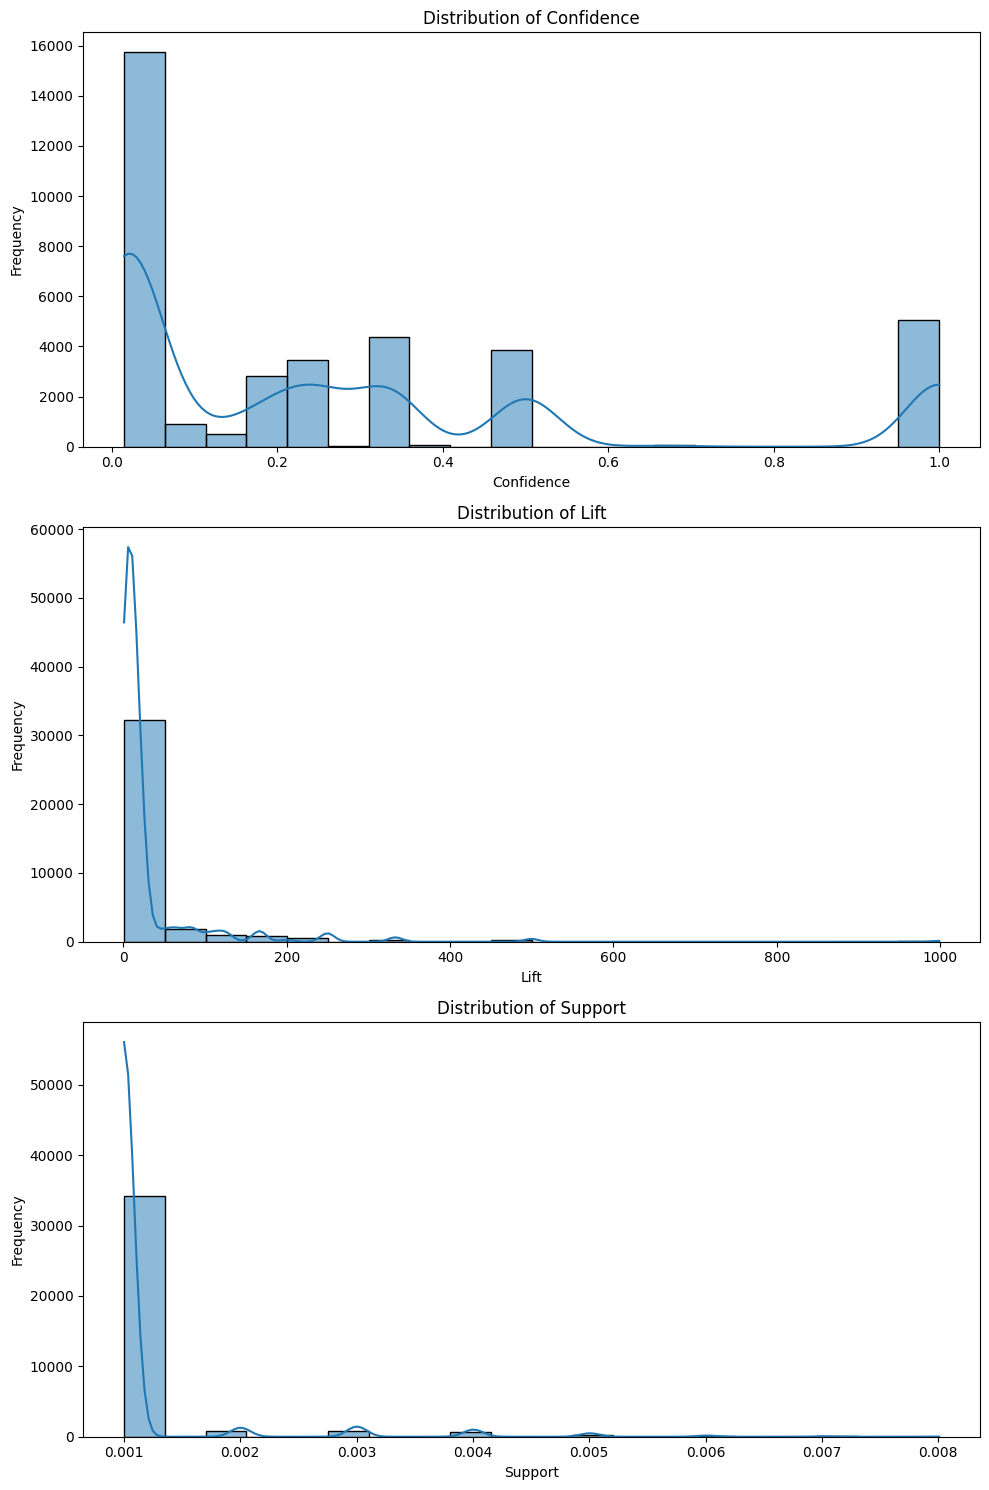

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# The histogram below illustrates the distribution of Confidence values among the association rules.
sns.histplot(rules['confidence'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Confidence')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Frequency')

# The histogram below illustrates the distribution of Lift values among the association rules.
sns.histplot(rules['lift'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Lift')
axes[1].set_xlabel('Lift')
axes[1].set_ylabel('Frequency')

# The histogram below illustrates the distribution of Support values among the association rules.
sns.histplot(rules['support'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Support')
axes[2].set_xlabel('Support')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()